In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
 df = pd.read_csv('/content/sample_data/DatosAzcapo.txt', sep = ',', header = None)
 df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,4/4/2024 12:00:00 AM,4/4/2024 6:00:00 AM,28.692070,14.742066,13.950004,23.128830,19.350910,77.827011,28.035599,25.874756,33.960640,11.665325,5.025064
1,4/4/2024 12:01:00 AM,4/4/2024 6:01:00 AM,32.022658,14.771019,17.251640,23.148970,19.340763,77.817986,27.919699,25.910034,33.966431,11.671605,5.068029
2,4/4/2024 12:02:00 AM,4/4/2024 6:02:00 AM,32.219123,14.717249,17.501873,23.169109,19.335342,77.820869,27.938000,25.910950,33.988586,11.663702,5.003208
3,4/4/2024 12:03:00 AM,4/4/2024 6:03:00 AM,31.586301,14.659344,16.926957,23.169109,19.330561,77.814812,27.956299,25.925995,33.997185,11.670901,4.931069
4,4/4/2024 12:04:00 AM,4/4/2024 6:04:00 AM,32.534500,14.676922,17.857577,23.199320,19.308531,77.830132,27.956299,25.948059,34.013283,11.678738,5.000206


In [5]:
df['fechas'] = pd.to_datetime(df[0])
df = df.set_index('fechas')

PM10  = df[2]
PM25  = df[3]
PMmix = df[4]   # Mezcla PM 10-25
Temp  = df[6]
Pres  = df[7]
RH    = df[8]

<ipython-input-5-a04cc33ea1b9>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['fechas'] = pd.to_datetime(df[0])


In [6]:
variable = ['$PM_{10}$', '$PM_{2.5}$', '$PM_{mix}$', 'T', 'P', 'RH']
colors = ['black', 'red', 'blue', 'green', 'orange', 'brown']

In [7]:
def plot_var(var, index, min, max):
  plt.figure(figsize = (16, 3))
  plt.plot(var.iloc[min:max], color = colors[index], label = variable[index])
  plt.xlabel('Tiempo', fontsize = 12)
  plt.ylabel(f'{variable[index]}', fontsize = 12)
  plt.legend()
  plt.grid()
  plt.show()

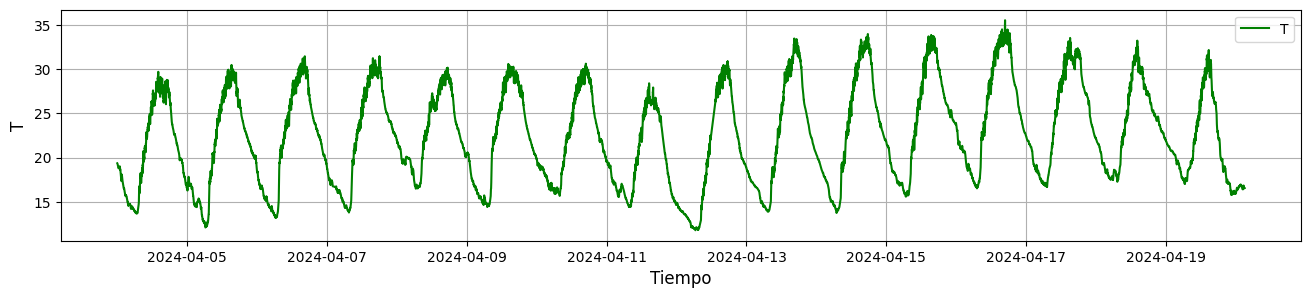

In [8]:
index = 3
plot_var(Temp, index, 0, 50000)

Coeficiente de asimetría de Fisher
* \> 0, la distribución es asimétrica positiva
* < 0, la distribución es asimétrica negativa




In [9]:
df.skew(numeric_only = True)    # Toma únicamente los valores numéricos del DF

,0
2,2.852911
3,0.894236
4,3.521653
5,2.785009
6,0.147419
7,0.285173
8,-0.546505
9,0.595972
10,2.466857
11,1.173082


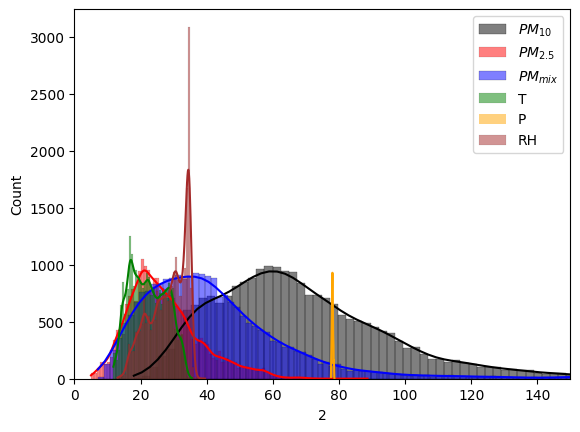

In [10]:
vars = [PM10, PM25, PMmix, Temp, Pres, RH]
for i in range(6):
  sns.histplot(vars[i], color = colors[i], label = variable[i], kde = True)
plt.xlim(0, 150)
plt.legend(loc = 'upper right')
plt.show()

In [11]:
df.kurt(numeric_only = True)    # Valoress de la curtosis

,0
2,16.999052
3,0.954185
4,21.697910
5,10.327528
6,-1.046538
7,-0.266420
8,-0.828570
9,2.156290
10,9.471267
11,70.707223


* \> 0 distribución leptocúrtica (con colas más largas que la Normal).
* = 0 distribución mesocúrtica (tiene distribución Normal o su misma curtosis).
* < 0 distribución platicúrtica (con colas menos largas que la Normal).

Ninguna de las anteriores tiene una distribución Normal. Por ende, se usa el coeficiente de correlación de Spearman.

In [12]:
# Calcular la correlación

correlation0 = df[3].corr(df[2], method = 'spearman')
correlation1 = df[3].corr(df[4], method = 'spearman')
correlation2 = df[3].corr(df[6], method = 'spearman')
correlation3 = df[3].corr(df[7], method = 'spearman')
correlation4 = df[3].corr(df[8], method = 'spearman')

print(f'Correlación entre PM2.5 y PM10:   {correlation0}')
print(f'Correlación entre PM2.5 y PMmix:  {correlation1}')
print(f'Correlación entre PM2.5 y Temp:   {correlation2}')
print(f'Correlación entre PM2.5 y Pres:   {correlation3}')
print(f'Correlación entre PM2.5 y RH:     {correlation4}')

Correlación entre PM2.5 y PM10:   0.672152040453448
Correlación entre PM2.5 y PMmix:  0.38563514115000125
Correlación entre PM2.5 y Temp:   -0.0961724889092757
Correlación entre PM2.5 y Pres:   0.2592873313442194
Correlación entre PM2.5 y RH:     0.5770341743575754


Para predecir una variable se deben usar variables con una alta correlación

In [29]:
# Para predecir PM25:
Data_in = np.column_stack([Temp, Pres])
Data_out = np.column_stack([PM25])
print(Data_in)
print(len(Data_in))

[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 ...
 [16.57391548 78.22721863]
 [16.55928421 78.21746826]
 [16.55773163 78.2065506 ]]
22954


Se puede entrenar un modelo de Redes Neuronales a partir de series temporales. Existen varios caminos:

In [30]:
Data_in.shape[1]  # Cantidad de columnas en Data_in
Data_in.shape # No. de filas, columnas

(22954, 2)

In [31]:
# para crear el modelo secuencial con TensorFlow (Solo se toma un conjunto de datos, aunque se pueden tomar más. En este caso solo se toma uno)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = 'linear', input_shape = (Data_in.shape[1],)),   # Revisar porqué ',)),' y no ')),'
    tf.keras.layers.Dense(1, activation = 'linear')   # Esto crea un modelo de 2 capas con 3 y 1 neuronas (separada con ','). La primera siempre debe definir el input_shape
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
  # Resumen del modelo:
  model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

Dividir los datos para el entrenamiento

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data_in, Data_out, test_size = 0.2, random_state= 42)

In [34]:
print(Data_in[:5])
print(X_train[:5])

[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 [19.33056068 77.81481171]
 [19.30853081 77.83013153]]
[[16.43444633 78.02246094]
 [22.36110115 78.04722595]
 [26.19436836 77.92735291]
 [33.37938309 77.79177094]
 [19.08875465 77.88285065]]


Estos datos no mantienen la continuidad de la serie temporal, sino aleatoria, entonces se hace algo distinto

In [35]:
train_split = int(0.7 * len(Data_in))
print(train_split)

X_train, y_train = Data_in[0:train_split], Data_out[0:train_split]
X_test, y_test = Data_in[train_split:len(Data_in)], Data_out[train_split:len(Data_in)]

16067


In [36]:
print(Data_in[0:train_split])
X_train

[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 ...
 [15.7848959  78.08027649]
 [15.76616955 78.08150482]
 [15.74197865 78.06330872]]


array([[19.35091019, 77.82701111],
       [19.34076309, 77.81798553],
       [19.33534241, 77.82086945],
       ...,
       [15.7848959 , 78.08027649],
       [15.76616955, 78.08150482],
       [15.74197865, 78.06330872]])

#Clase 7

In [37]:
# Compila modelo
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Entrenar modelo
model.fit(X_train, y_train, epochs = 50, verbose = 0)   # verbose puede ser 0, 1 o 2 (modifica la visualización 'del avance' de las epocas)

# La gráfica de epochs vs Error debe ser similar al frente de pareto, por el contrario, si es muy ruidosa, indica que el modelo no se entrenó adecuadamente
# Por ejemplo, la cantidad de neuronas o capas no es adeecuada

In [38]:
# Validación y predicción
train_predictions = model.predict(X_train)
print(f'Reproducción de datos de entrenamiento:\n {train_predictions}')
print(X_train)
test_predictions = model.predict(X_test)
print(f'Predicción de datos:\n {test_predictions}')

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Reproducción de datos de entrenamiento:
 [[25.088081]
 [25.087593]
 [25.090435]
 ...
 [26.298603]
 [26.304913]
 [26.305103]]
[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 ...
 [15.7848959  78.08027649]
 [15.76616955 78.08150482]
 [15.74197865 78.06330872]]
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicción de datos:
 [[26.304756]
 [26.306805]
 [26.296986]
 ...
 [26.112537]
 [26.113152]
 [26.109234]]


In [39]:
print(len(train_predictions))
print(len(y_train))

16067
16067


Evaluación del modelo

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Interpolación
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

print(f'MÉTRICAS DE LA INTERPOLACIÓN:')
print(f'Error cuadrático medio (MSE): {mse}')
#print(f'Error absoluto medio (MAE): {mae}')
print(f'R2: {r2}')

# Extrapolación
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'MÉTRICAS DE LA EXTRAPOLACIÓN:')
print(f'Error cuadrático medio (MSE): {mse}')
#print(f'Error absoluto medio (MAE): {mae}')
print(f'R2: {r2}')

MÉTRICAS DE LA INTERPOLACIÓN:
Error cuadrático medio (MSE): 75.74280349219596
R2: 0.0362535559339946
MÉTRICAS DE LA EXTRAPOLACIÓN:
Error cuadrático medio (MSE): 257.53408487750795
R2: -1.0403399638589463


Estas métricas indican que no es un buen modelo de predicción

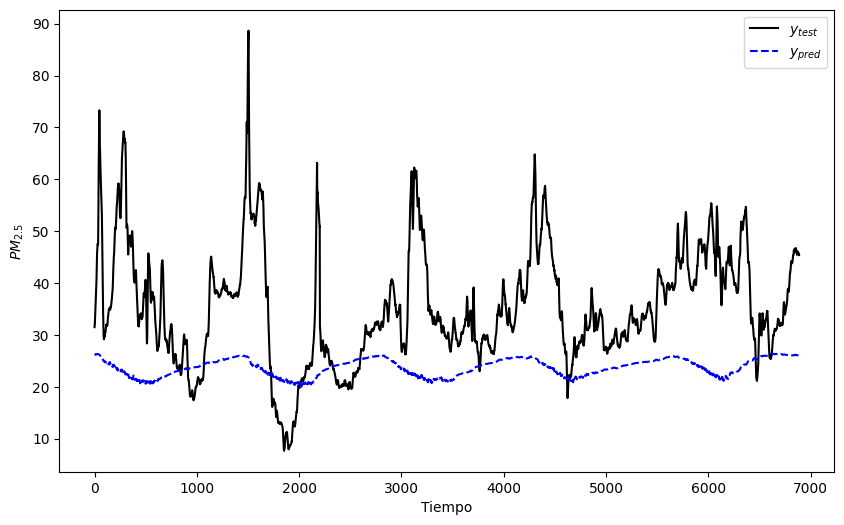

In [43]:
plt.figure(figsize = (10, 6))
plt.plot(y_test, '-', color = 'black', label = '$y_{test}$')
plt.plot(test_predictions, '--', color = 'blue', label = '$y_{pred}$')
plt.xlabel('Tiempo')
plt.ylabel('$PM_{2.5}$')
plt.legend()
#plt.grid()
plt.show()

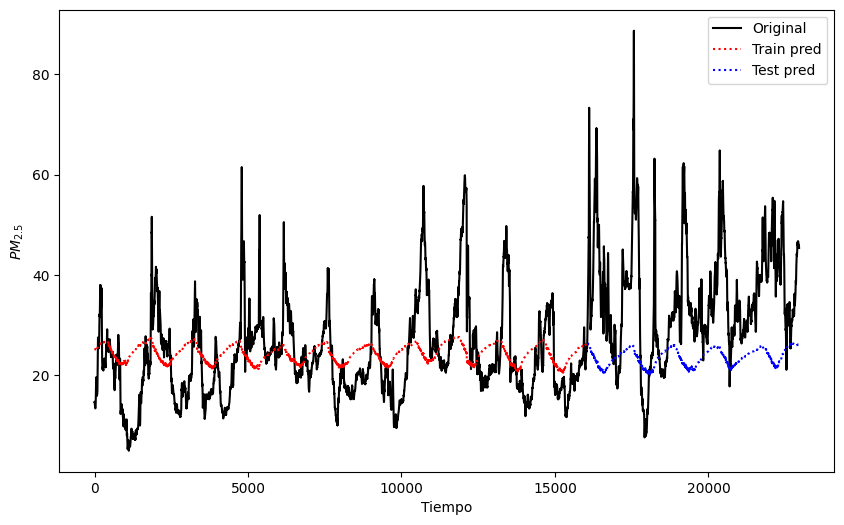

In [44]:
pl1 = np.vstack((train_predictions, test_predictions))
plt.figure(figsize = (10, 6))
plt.plot(Data_out, color = 'black', label ='Original')
plt.plot(range(len(y_train)), pl1[:len(y_train)], ':', color = 'red', label = 'Train pred')
plt.plot(range(len(y_train), len(pl1)), pl1[len(y_train):], ':', color = 'blue', label = 'Test pred')
plt.xlabel('Tiempo')
plt.ylabel('$PM_{2.5}$')
plt.legend()
#plt.grid()
plt.show()

Usando otro optimizador

In [45]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = 'linear', input_shape = (Data_in.shape[1],)),
    tf.keras.layers.Dense(1, activation = 'linear')
])

opt = tf.keras.optimizers.Adagrad(learning_rate = 0.1)

model.compile(optimizer = opt, loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs = 50, verbose = 0)

In [48]:
# Predicciones
train_predictions = model.predict(X_train)
print(f'Predicción de datos de entrenamiento:\n {train_predictions}')
print(X_train)
test_predictions = model.predict(X_test)
print(f'Validación del modelo:\n {train_predictions}')

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicción de datos de entrenamiento:
 [[23.410126]
 [23.40996 ]
 [23.412819]
 ...
 [24.661959]
 [24.668493]
 [24.669361]]
[[19.35091019 77.82701111]
 [19.34076309 77.81798553]
 [19.33534241 77.82086945]
 ...
 [15.7848959  78.08027649]
 [15.76616955 78.08150482]
 [15.74197865 78.06330872]]
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validación del modelo:
 [[23.410126]
 [23.40996 ]
 [23.412819]
 ...
 [24.661959]
 [24.668493]
 [24.669361]]


In [49]:
# Interpolación
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

print(f'MÉTRICAS DE LA INTERPOLACIÓN:')
print(f'Error cuadrático medio (MSE): {mse}')
#print(f'Error absoluto medio (MAE): {mae}')
print(f'R2: {r2}')

# Extrapolación
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'MÉTRICAS DE LA EXTRAPOLACIÓN:')
print(f'Error cuadrático medio (MSE): {mse}')
#print(f'Error absoluto medio (MAE): {mae}')
print(f'R2: {r2}')

MÉTRICAS DE LA INTERPOLACIÓN:
Error cuadrático medio (MSE): 76.32372158358439
R2: 0.028861992391896574
MÉTRICAS DE LA EXTRAPOLACIÓN:
Error cuadrático medio (MSE): 301.1845160491791
R2: -1.386164941556931


Nuevamente esto no parece ser un buen modelo

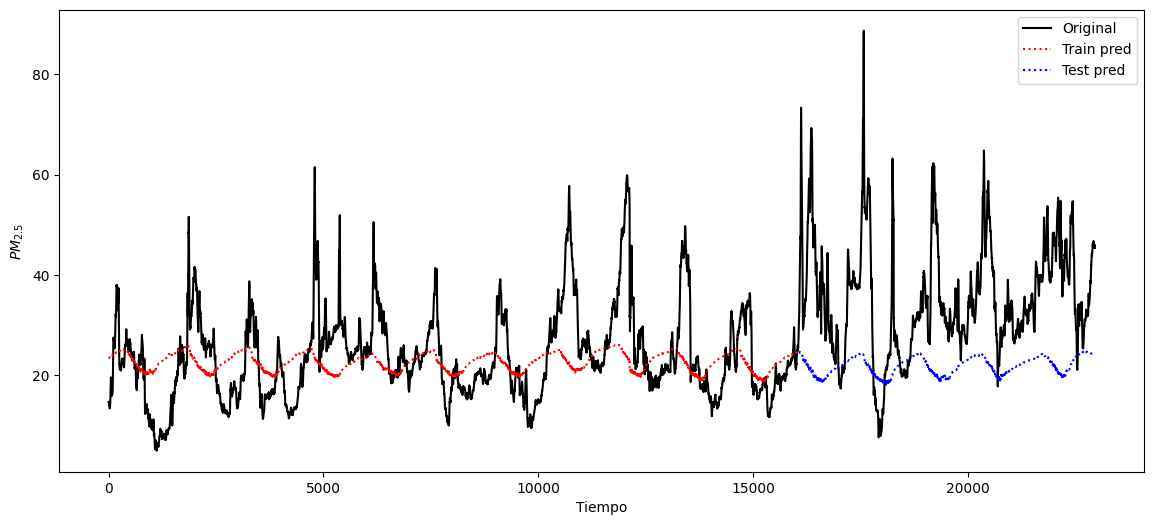

In [52]:
pl1 = np.vstack((train_predictions, test_predictions))
plt.figure(figsize = (14, 6))
plt.plot(Data_out, color = 'black', label ='Original')
plt.plot(range(len(y_train)), pl1[:len(y_train)], ':', color = 'red', label = 'Train pred')
plt.plot(range(len(y_train), len(pl1)), pl1[len(y_train):], ':', color = 'blue', label = 'Test pred')
plt.xlabel('Tiempo')
plt.ylabel('$PM_{2.5}$')
plt.legend()
#plt.grid()
plt.show()

Usando las variables mejor correlacionadas para generar un modelo que reproduzca el comportamiento de las PM2.5

In [53]:
Data_in = np.column_stack([RH, PM10, PMmix])

train_split = int(0.7 * len(Data_in))
print(train_split)

X_train, y_train = Data_in[0:train_split], Data_out[0:train_split]
X_test, y_test = Data_in[train_split:len(Data_in)], Data_out[train_split:len(Data_in)]

16067


In [54]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation = 'linear', input_shape = (Data_in.shape[1],)),
    tf.keras.layers.Dense(1, activation = 'linear')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [56]:
model.fit(X_train, y_train, epochs = 50, verbose = 0)

In [57]:
# Hacer las predicciones
train_predictions = model.predict(X_train)
print(f'Predicción de datos de entrenamiento:\n {train_predictions}')
test_predictions = model.predict(X_test)
print(f'Validación del modelo:\n {test_predictions}')

503/503 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicción de datos de entrenamiento:
 [[14.751053]
 [14.780817]
 [14.727091]
 ...
 [30.585485]
 [31.05271 ]
 [31.135103]]
216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validación del modelo:
 [[31.517225]
 [31.903978]
 [32.11249 ]
 ...
 [45.59018 ]
 [45.535316]
 [45.406937]]


In [58]:
# Interpolación
mse = mean_squared_error(y_train, train_predictions)
mae = mean_absolute_error(y_train, train_predictions)
r2 = r2_score(y_train, train_predictions)

print(f'MÉTRICAS DE LA INTERPOLACIÓN:')
print(f'Error cuadrático medio (MSE): {mse}')
#print(f'Error absoluto medio (MAE): {mae}')
print(f'R2: {r2}')

# Extrapolación
mse = mean_squared_error(y_test, test_predictions)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f'MÉTRICAS DE LA EXTRAPOLACIÓN:')
print(f'Error cuadrático medio (MSE): {mse}')
#print(f'Error absoluto medio (MAE): {mae}')
print(f'R2: {r2}')

MÉTRICAS DE LA INTERPOLACIÓN:
Error cuadrático medio (MSE): 0.0057004398973296835
R2: 0.9999274679781132
MÉTRICAS DE LA EXTRAPOLACIÓN:
Error cuadrático medio (MSE): 0.0028502906657126553
R2: 0.9999774182824901


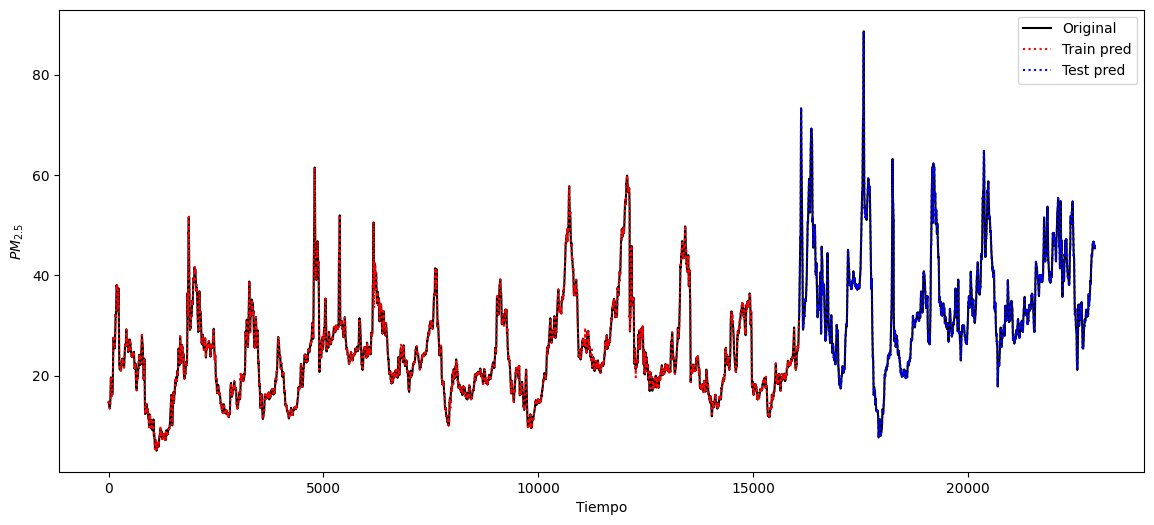

In [59]:
pl1 = np.vstack((train_predictions, test_predictions))
plt.figure(figsize = (14, 6))
plt.plot(Data_out, color = 'black', label ='Original')
plt.plot(range(len(y_train)), pl1[:len(y_train)], ':', color = 'red', label = 'Train pred')
plt.plot(range(len(y_train), len(pl1)), pl1[len(y_train):], ':', color = 'blue', label = 'Test pred')
plt.xlabel('Tiempo')
plt.ylabel('$PM_{2.5}$')
plt.legend()
#plt.grid()
plt.show()

# Elección del mejor modelo

Time Split Series

In [60]:
Data_in = np.column_stack([RH, PM10, PMmix])


In [62]:
K_folds = 10
Fold_len = len(Data_in) / K_folds
Folds = []
sets = []

for k in range(K_folds):
  sets.append([round(k*Fold_len), round((k+1)*Fold_len)])
  Folds.append(Data_in[round(k*Fold_len):round((k+1)*Fold_len)])

sets.append([len(Data_in), 0])
sets = np.array(sets)

print(sets)

[[    0  2295]
 [ 2295  4591]
 [ 4591  6886]
 [ 6886  9182]
 [ 9182 11477]
 [11477 13772]
 [13772 16068]
 [16068 18363]
 [18363 20659]
 [20659 22954]
 [22954     0]]


In [68]:
def Set(i, Data_in, Data_out, porcentaje, flag):
    if i >= len(sets) - 1:
        raise ValueError('EL valor de i es demasiado grande')

    # Determinar índices de entrenamiento y prueba
    train_start, train_end = sets[0,0] , sets[i,1]
    test_start, test_end = sets[i,1], sets[i+1,1]

    # Dividir los datos en conjuntos de entrenamiento y prueba
    X_train, y_train = Data_in[train_start:train_end], Data_out[train_start:train_end]
    X_test, y_test = Data_in[test_start:test_end], Data_out[test_start:test_end]

    # Crear array para graficar
    train_indices = np.arange(train_start, train_end)
    test_indices = np.arange(test_start, test_end)

    # Graficar los datos
    if flag == True:
        plt.plot(Data_out, color = 'black', label ='Original')
        plt.plot(train_indices, y_train, '--', color = 'blue', label = 'Train')
        plt.plot(test_indices, y_test, '--', color = 'red', label = 'Test')

        plt.legend()
        plt.show()
    return X_train, y_train, X_test, y_test

    return X_train, y_train, X_test, y_test

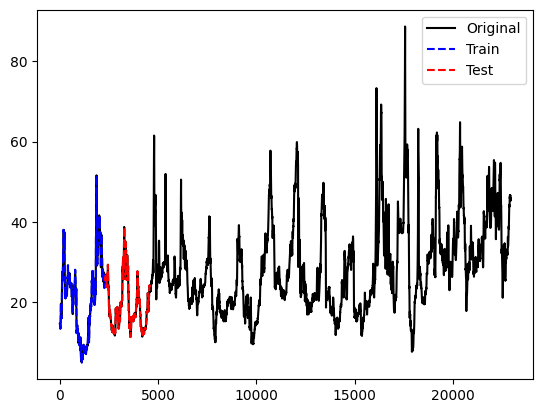

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


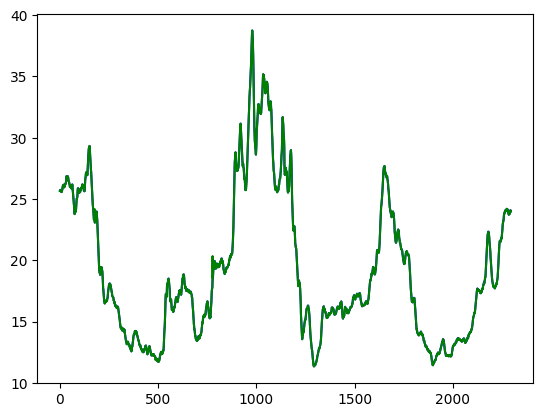

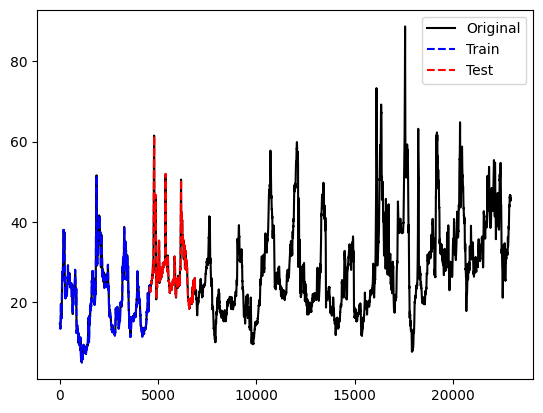

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


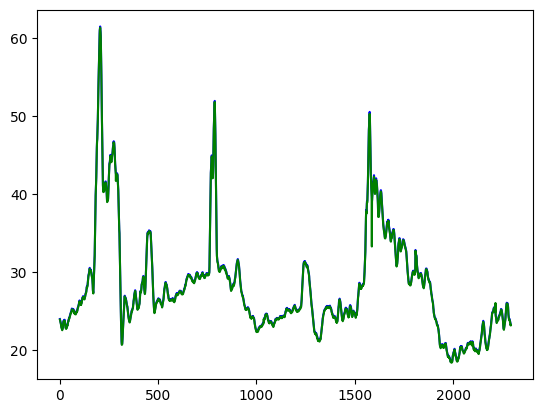

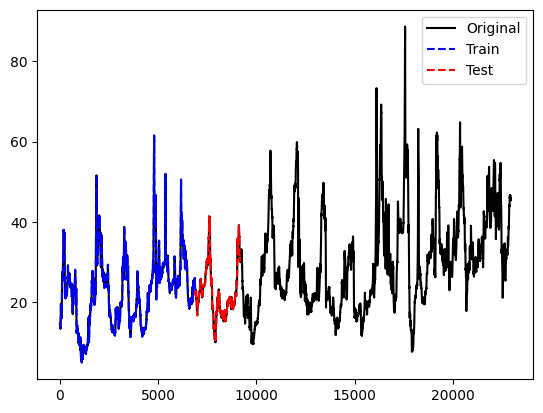

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


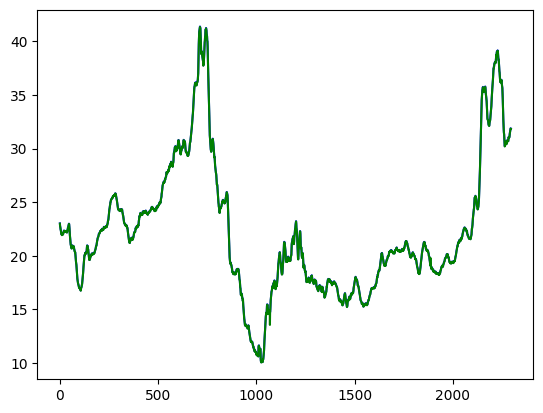

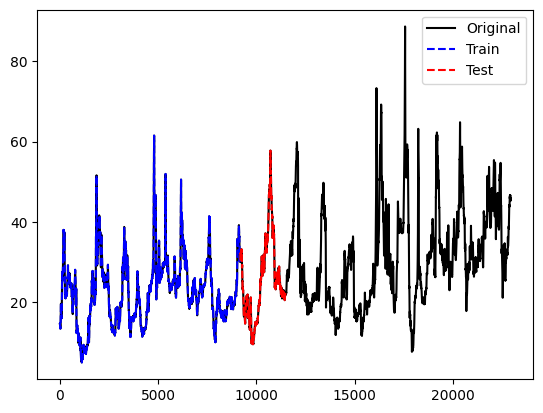

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


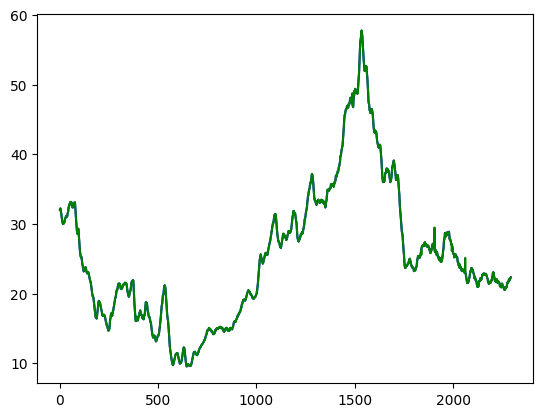

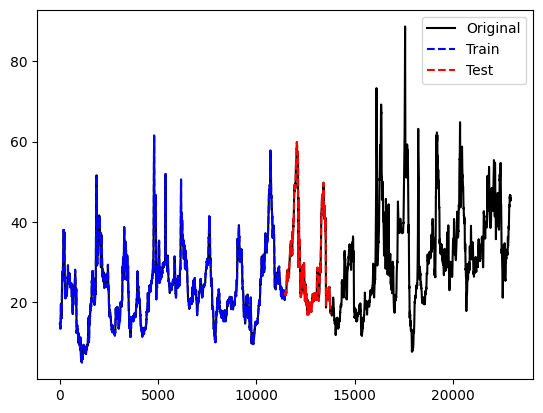

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


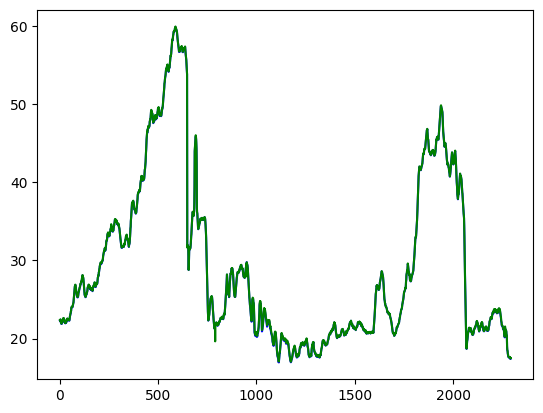

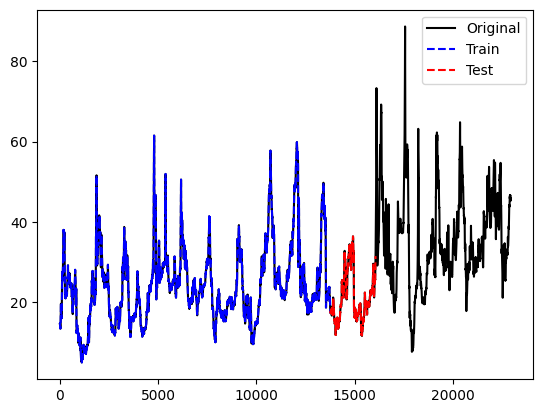

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


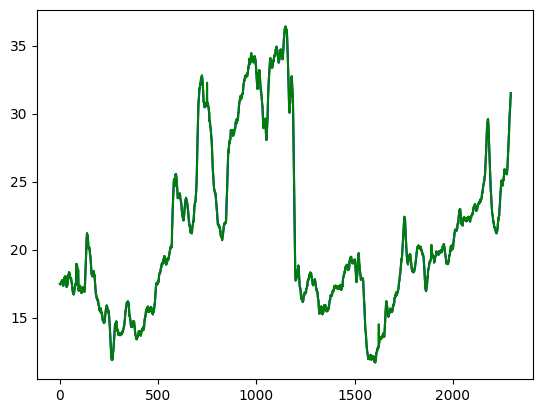

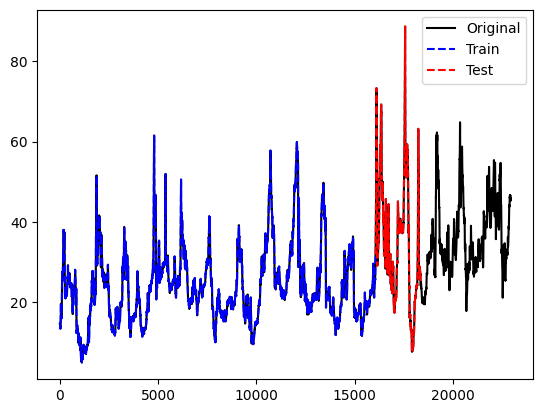

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


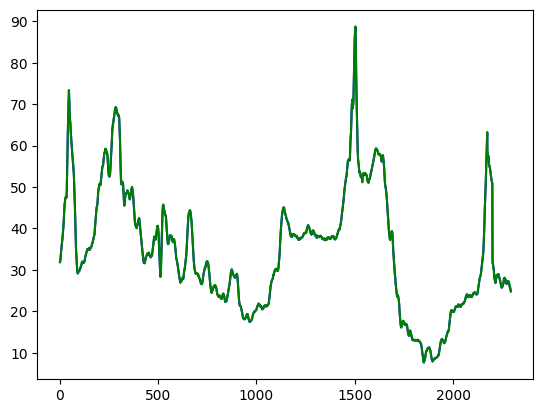

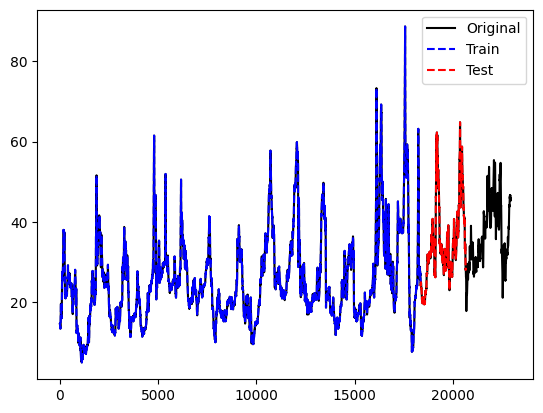

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


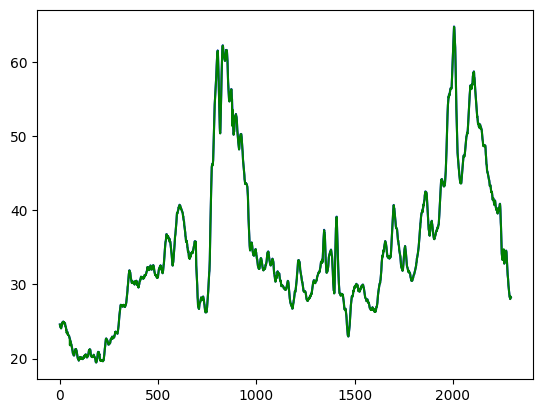

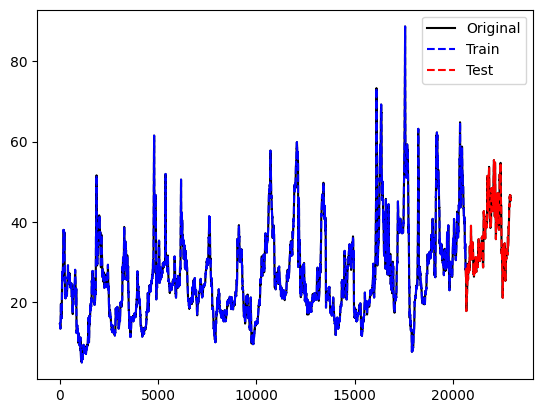

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


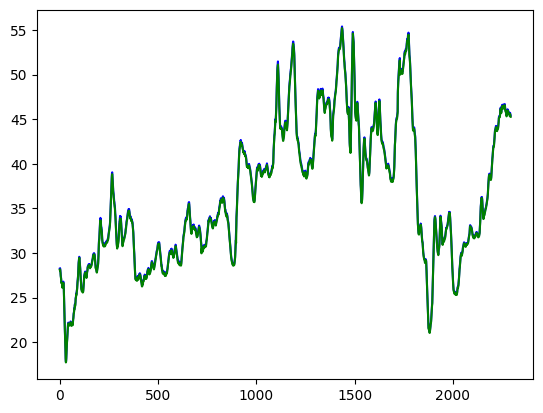

In [69]:
MSE = []
R2 = []

for i in range(len(sets) - 2):
    X_train, y_train, X_test, y_test = Set(i, Data_in, Data_out, 0.7, True)   # El 'True' es para graficar
    model.fit(X_train, y_train, epochs = 50, verbose = 0)
    test_predictions = model.predict(X_test)
    MSE.append(mean_squared_error(y_test, test_predictions))
    rr = r2_score(y_test, test_predictions)
    R2.append(rr)
    plt.plot(y_test, color = 'blue')
    plt.plot(test_predictions, color = 'green')
    plt.show()

In [70]:
 print('MSE promedio: ', np.mean(MSE))
 print('R2 promedio: ', np.mean(R2))

MSE promedio:  0.00916454955669855
R2 promedio:  0.9998431996562971


La selección de hiperparámetros puede ser manual o también usando la función GridSearch